In [85]:
from keras.layers import Input, Dense
from keras.models import Model
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn import decomposition
import matplotlib.pyplot as plt
import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

plt.style.use('seaborn')

In [90]:
metro = pd.read_csv("./data/Metro_time_series.csv")
metro.columns

Index(['Date', 'RegionName', 'AgeOfInventory', 'DaysOnZillow_AllHomes',
       'InventorySeasonallyAdjusted_AllHomes', 'InventoryRaw_AllHomes',
       'InventorySeasonallyAdjusted_BottomTier',
       'InventorySeasonallyAdjusted_MiddleTier',
       'InventorySeasonallyAdjusted_TopTier',
       'MedianListingPricePerSqft_1Bedroom',
       'MedianListingPricePerSqft_2Bedroom',
       'MedianListingPricePerSqft_3Bedroom',
       'MedianListingPricePerSqft_4Bedroom',
       'MedianListingPricePerSqft_5BedroomOrMore',
       'MedianListingPricePerSqft_AllHomes',
       'MedianListingPricePerSqft_CondoCoop',
       'MedianListingPricePerSqft_DuplexTriplex',
       'MedianListingPricePerSqft_SingleFamilyResidence',
       'MedianListingPrice_1Bedroom', 'MedianListingPrice_2Bedroom',
       'MedianListingPrice_3Bedroom', 'MedianListingPrice_4Bedroom',
       'MedianListingPrice_5BedroomOrMore', 'MedianListingPrice_AllHomes',
       'MedianListingPrice_CondoCoop', 'MedianListingPrice_DuplexTrip

In [39]:
# Filter data
prefilter_shape = metro.shape[0]
cols = ['Date', 'RegionName', 'MedianListingPricePerSqft_AllHomes',
       'MedianListingPricePerSqft_CondoCoop',
       'MedianListingPricePerSqft_DuplexTriplex',
       'MedianListingPricePerSqft_SingleFamilyResidence','MedianListingPrice_AllHomes',
       'MedianListingPrice_CondoCoop', 'MedianListingPrice_DuplexTriplex',
       'MedianListingPrice_SingleFamilyResidence',
       'MedianPctOfPriceReduction_CondoCoop',
       'MedianPctOfPriceReduction_SingleFamilyResidence', 'MedianPriceCutDollar_CondoCoop',
       'MedianPriceCutDollar_SingleFamilyResidence',
       'MedianRentalPricePerSqft_AllHomes',
       'MedianRentalPricePerSqft_CondoCoop',
       'MedianRentalPricePerSqft_DuplexTriplex',
       'MedianRentalPricePerSqft_MultiFamilyResidence5PlusUnits',
       'MedianRentalPricePerSqft_SingleFamilyResidence',
       'MedianRentalPricePerSqft_Studio',
       'MedianRentalPrice_AllHomes', 'MedianRentalPrice_CondoCoop',
       'MedianRentalPrice_DuplexTriplex',
       'MedianRentalPrice_MultiFamilyResidence5PlusUnits',
       'MedianRentalPrice_SingleFamilyResidence', 'MedianRentalPrice_Studio',
       'PctOfHomesDecreasingInValues_AllHomes',
       'PctOfHomesIncreasingInValues_AllHomes',
       'PctOfHomesSellingForGain_AllHomes',
       'PctOfHomesSellingForLoss_AllHomes',
       'PctOfListingsWithPriceReductionsSeasAdj_AllHomes',
       'PctOfListingsWithPriceReductionsSeasAdj_BottomTier',
       'PctOfListingsWithPriceReductionsSeasAdj_CondoCoop',
       'PctOfListingsWithPriceReductionsSeasAdj_MiddleTier',
       'PctOfListingsWithPriceReductionsSeasAdj_SingleFamilyResidence',
       'PctOfListingsWithPriceReductionsSeasAdj_TopTier',
       'PctOfListingsWithPriceReductions_AllHomes',
       'PctOfListingsWithPriceReductions_BottomTier',
       'PctOfListingsWithPriceReductions_CondoCoop',
       'PctOfListingsWithPriceReductions_MiddleTier',
       'PctOfListingsWithPriceReductions_SingleFamilyResidence',
       'PctOfListingsWithPriceReductions_TopTier', 'PriceToRentRatio_AllHomes']
city_filter1 = metro.filter(cols)
for i in tqdm(cols):
    city_filter1 = city_filter1[city_filter1[str(i)].isnull() == False]
cityList = city_filter1.filter(['Date', 'RegionName'])
city_filter1 = city_filter1.drop(['Date', 'RegionName'], axis='columns')

postfilter_shape = city_filter1.shape[0]

print(city_filter1.head())
print(cityList.head())
print(city_filter1.shape)
# print(city_filter1.sort_values('Date', ascending=True).head())
print("Filtered", (prefilter_shape - postfilter_shape), "values")

100%|██████████| 43/43 [00:00<00:00, 235.14it/s]

        MedianListingPricePerSqft_AllHomes  \
166163                          325.032510   
167072                          324.213972   
167981                          321.456235   
168890                          325.203252   
169799                          327.313770   

        MedianListingPricePerSqft_CondoCoop  \
166163                           321.631879   
167072                           318.756074   
167981                           316.984559   
168890                           320.047653   
169799                           320.163488   

        MedianListingPricePerSqft_DuplexTriplex  \
166163                               243.371212   
167072                               242.404654   
167981                               236.880466   
168890                               236.288749   
169799                               241.651799   

        MedianListingPricePerSqft_SingleFamilyResidence  \
166163                                       326.183499   
167072         

In [65]:
# PCA analysis
pca = decomposition.PCA(n_components=1)
pca.fit(city_filter1)
city_PCA = pca.transform(city_filter1)
city_PCA = pd.DataFrame(data=city_PCA, columns=['1'])
city_PCA = city_PCA.join(pd.DataFrame(data=cityList.to_numpy(), columns=['Date', 'RegionName']))
city_PCA

,1,Date,RegionName
0,159090.549177,2013-11-30,31080
1,166275.429708,2013-12-31,31080
2,136049.422171,2014-01-31,31080
3,145225.253921,2014-02-28,31080
4,159278.527434,2014-03-31,31080
...,...,...,...
97,522084.029740,2017-08-31,31080
98,-361998.212709,2017-08-31,United_States
99,-33368.298047,2017-09-30,19740
100,513379.785963,2017-09-30,31080


In [66]:
np.unique(city_PCA['RegionName'])

array(['19740', '31080', 'United_States'], dtype=object)

In [67]:
# Filter for a region
data_31080 = city_PCA[city_PCA['RegionName'] == '31080']
data_31080.shape

(47, 3)

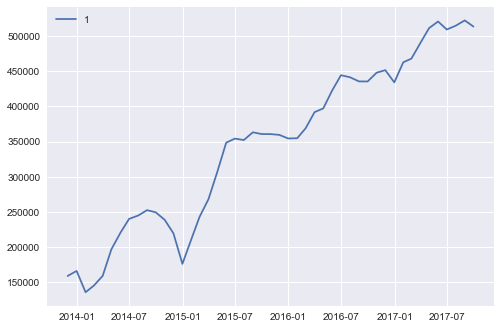

In [86]:
# Graph data
fig, ax = plt.subplots()
ax.plot(pd.to_datetime(data_31080['Date']).dt.date, data_31080['1'], label='1')
ax.legend()

plt.show()

(261, 95)


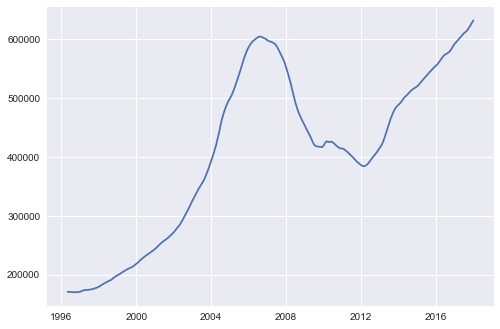

In [91]:
# Plot other features just to check
city_filter2 = metro[metro['RegionName'] == '31080']
print(city_filter2.shape)
plt.plot(pd.to_datetime(city_filter2['Date']).dt.date, city_filter2['ZHVI_AllHomes'])
plt.show()